Saving retail_sales_dataset.csv to retail_sales_dataset.csv
Sales Dataset:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  
Cleaned Sales Dataset:
   Transaction ID       date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST00

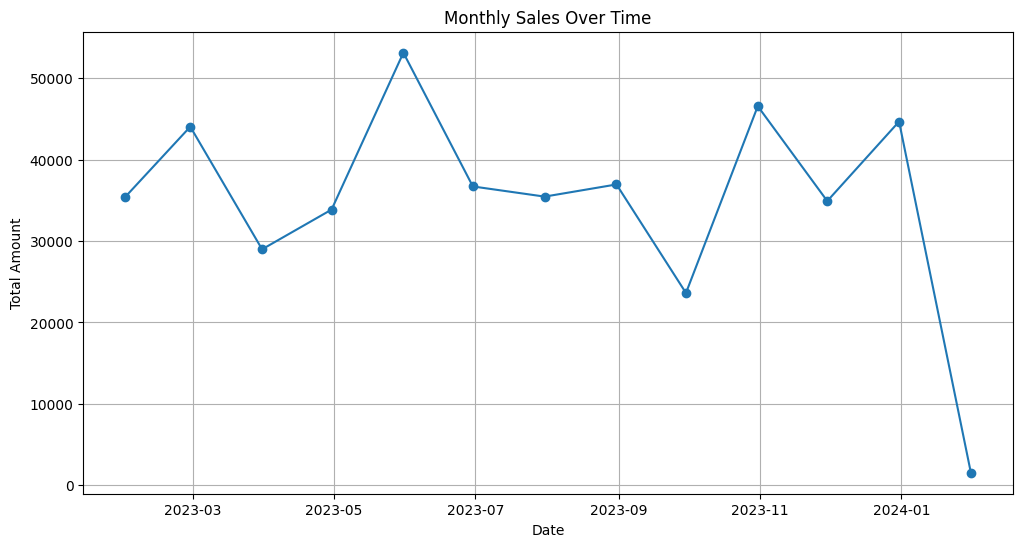

Customer Sales Descriptive Statistics:
 count    1000.000000
mean      456.000000
std       559.997632
min        25.000000
25%        60.000000
50%       135.000000
75%       900.000000
max      2000.000000
Name: Total Amount, dtype: float64
Product Sales Descriptive Statistics:
 count         3.000000
mean     152000.000000
std        7378.029886
min      143515.000000
25%      149547.500000
50%      155580.000000
75%      156242.500000
max      156905.000000
Name: Total Amount, dtype: float64


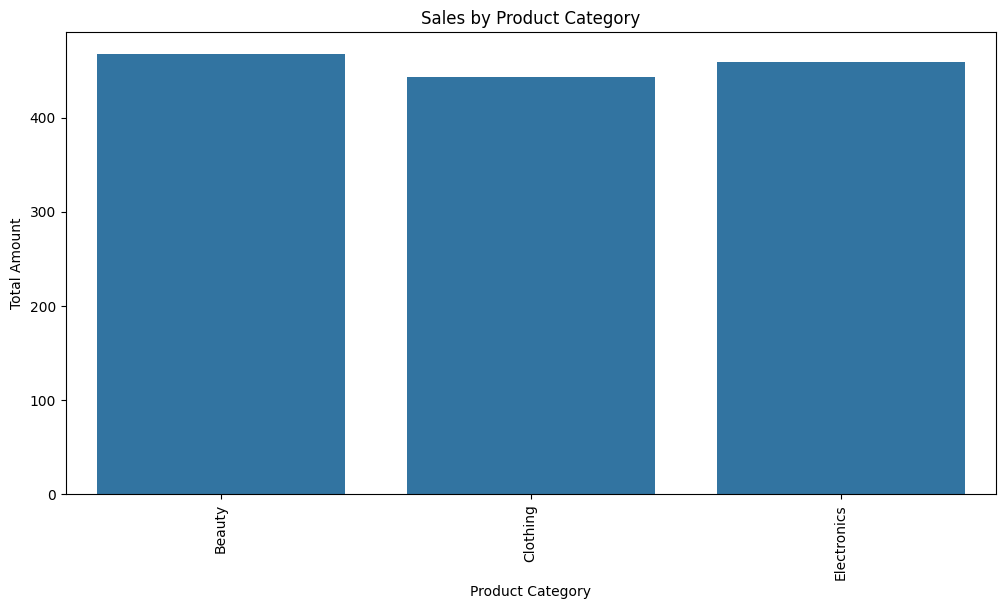

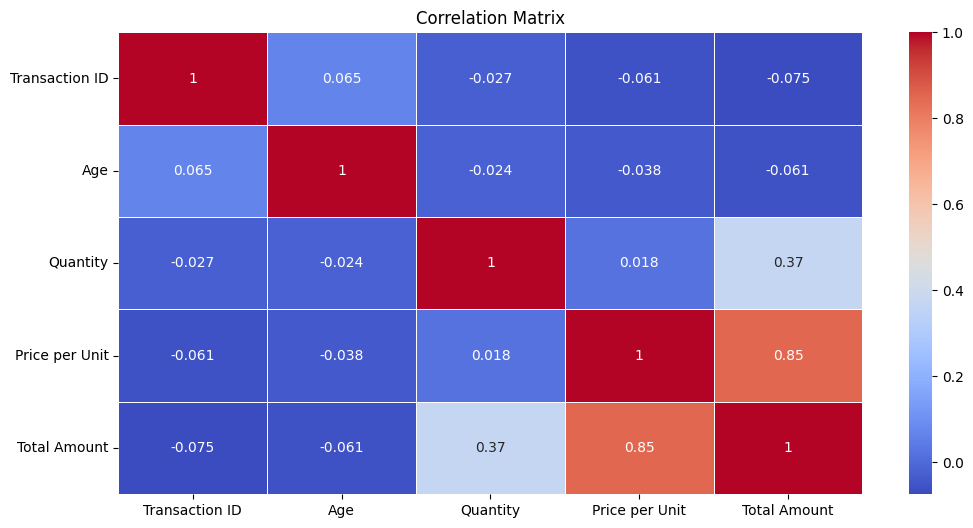


1. Focus marketing efforts on top-selling product categories to boost sales further.
2. Implement loyalty programs for high-value customers identified from the customer analysis.
3. Monitor and analyze monthly sales trends to identify and address seasonal variations.
4. Use the correlation matrix to understand relationships between different variables and inform strategic decisions.



In [1]:
# Step 1: Upload the File
from google.colab import files

uploaded = files.upload()

# Step 2: Load the Dataset
import pandas as pd

# Load dataset using filename from the uploaded dictionary
df_sales = pd.read_csv('retail_sales_dataset.csv')

# Display the first few rows of the dataset
print("Sales Dataset:")
print(df_sales.head())

# Step 3: Data Cleaning and Preprocessing
# Rename columns if needed
df_sales.rename(columns={'Date': 'date'}, inplace=True)

# Convert 'date' column to datetime
df_sales['date'] = pd.to_datetime(df_sales['date'])

# Display the first few rows of the cleaned sales dataset
print("Cleaned Sales Dataset:")
print(df_sales.head())

# Step 4: Descriptive Statistics
# Descriptive Statistics for numeric columns
numeric_cols = df_sales.select_dtypes(include=['float64', 'int64']).columns

print("Descriptive Statistics:\n", df_sales[numeric_cols].describe())

# Additional statistics for numeric columns
print("\nMode:\n", df_sales.mode().iloc[0][numeric_cols])
print("\nMedian:\n", df_sales[numeric_cols].median())
print("\nStandard Deviation:\n", df_sales[numeric_cols].std())

# Step 5: Time Series Analysis
import matplotlib.pyplot as plt

# Ensure 'date' is the index
df_sales.set_index('date', inplace=True)

# Resample and analyze monthly sales
monthly_sales = df_sales['Total Amount'].resample('M').sum()

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

# Step 6: Customer and Product Analysis
# Customer Analysis
customer_sales = df_sales.groupby('Customer ID')['Total Amount'].sum()
print("Customer Sales Descriptive Statistics:\n", customer_sales.describe())

# Product Analysis
product_sales = df_sales.groupby('Product Category')['Total Amount'].sum()
print("Product Sales Descriptive Statistics:\n", product_sales.describe())

# Step 7: Visualization
import seaborn as sns

# Bar chart for product sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Category', y='Total Amount', data=df_sales, errorbar=None)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=90)
plt.show()

# Heatmap for correlation matrix (selecting only numeric columns)
plt.figure(figsize=(12, 6))
sns.heatmap(df_sales[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Step 8: Recommendations
# Recommendations
recommendations = """
1. Focus marketing efforts on top-selling product categories to boost sales further.
2. Implement loyalty programs for high-value customers identified from the customer analysis.
3. Monitor and analyze monthly sales trends to identify and address seasonal variations.
4. Use the correlation matrix to understand relationships between different variables and inform strategic decisions.
"""

print(recommendations)
